
Date: 11/05/2018

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas (for dataframe, included in Anaconda Python 2.7) 
* re (for regular expression, included in Anaconda Python 2.7) 
* numpy (for numpy array, included in Anaconda Python 2.7) 
* sklearn (for linear regression)

## 1.  Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import numpy as np

## 2. Parse File

In [2]:
dataset4 = pd.read_csv('dataset4_with_outliers.csv')
dataset4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [3]:
dataset4.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [4]:
# %matplotlib inline
# bp_price = dataset4.boxplot(column = 'price')

In [5]:
# dataset4[dataset4['price'] > 1000000]

In [6]:
# bp_sqftlot = dataset4.boxplot(column = 'sqft_lot')

### a. Outliers of Bedrooms


#### Make a boxplot to observe the distribution

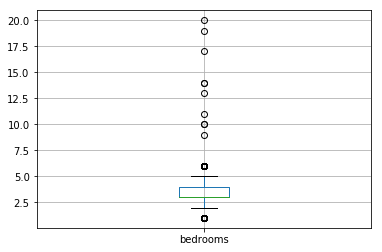

In [7]:
bp_bedroom = dataset4.boxplot(column = 'bedrooms')

In [8]:
dataset4.bedrooms.value_counts()

3     4637
4     3111
2     1308
5      722
6      126
1       82
14       2
10       2
13       1
20       1
19       1
11       1
17       1
9        1
Name: bedrooms, dtype: int64

In [9]:
# extract data where bedroom > 6
dataset4[dataset4.bedrooms > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
161,1214000050,20141020T000000,350000.0,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343
457,1951800580,20141024T000000,590000.0,10,2.50,3700,12500,1.0,0,0,5,8,1920,1780,1973,0,98006,47.5403,-122.168
2019,3644100073,20141122T000000,245000.0,14,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295
2610,2919200280,20141208T000000,720168.0,19,2.25,2120,3794,2.0,0,0,4,7,1420,700,1926,0,98117,47.6893,-122.359
2880,7738500475,20141212T000000,485000.0,14,3.25,2820,6611,1.0,0,0,3,7,1410,1410,1958,0,98155,47.7473,-122.285
4846,3211101010,20150211T000000,319500.0,11,1.00,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,47.4807,-122.157
7290,8682291840,20150331T000000,408000.0,10,2.00,1200,3900,1.0,0,0,3,8,1200,0,2006,0,98053,47.7200,-122.024
8004,9441300030,20150410T000000,615000.0,20,1.75,2620,8280,1.0,0,0,4,7,1330,1290,1948,0,98177,47.7235,-122.359
9655,739820050,20150505T000000,250000.0,17,2.50,1730,7200,2.0,0,0,4,7,1730,0,1985,0,98031,47.4029,-122.196
9774,3438500168,20150507T000000,325000.0,9,1.50,1060,7488,1.0,0,0,5,7,1060,0,1977,0,98106,47.5549,-122.356


From the box plot, it shows the outliers of bedrooms. And I get the all data whose "bedrooms" > 9. We know that if a house has 2 bathrooms it doesn't make sense to contain 20 bedrooms. So all of outliers (bedrooms >9) are unreal value.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


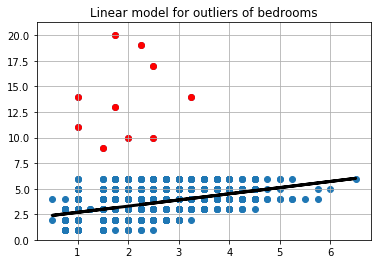

In [10]:
# use linear model to find out outliers
regr_bath_bed = linear_model.LinearRegression()
regr_bath_bed.fit(dataset4['bathrooms'].reshape(-1,1), dataset4['bedrooms'])
plt.scatter(dataset4['bathrooms'],dataset4['bedrooms'])
plt.plot(dataset4['bathrooms'], regr_bath_bed.predict(dataset4['bathrooms'].reshape(-1,1)), color = 'black', linewidth = 3)
plt.scatter(dataset4.bathrooms[dataset4.bedrooms > 6], dataset4.bedrooms[dataset4.bedrooms > 6],color = "red")
plt.title("Linear model for outliers of bedrooms")

plt.grid()
plt.show()

The outliers on the scatter plot and linear model are much far away from the linear model line.

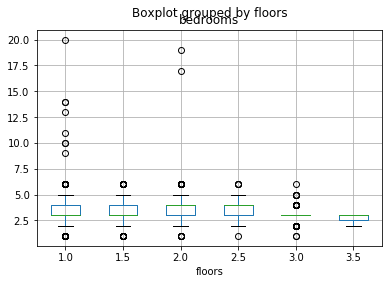

In [11]:
dataset4.boxplot(column = 'bedrooms', by= 'floors')

In [12]:
dataset4[(dataset4.floors > 2) & (dataset4['bedrooms'] == 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
21,424049284,20141016T000000,310000.0,1,1.5,1120,912,3.0,0,0,3,7,1120,0,2011,0,98144,47.5924,-122.299
2737,2025079033,20141210T000000,415000.0,1,2.0,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014,47.6331,-121.945
3840,2767604252,20150112T000000,344000.0,1,1.5,760,779,3.0,0,0,3,8,760,0,2006,0,98107,47.6715,-122.382


A house has 3 floors and only one bedroom and one and a half bathrooms. It doesn't make sense.

In [13]:
# all house with 2 bathrooms and 1 bedroom which doesn't make sense
dataset4[(dataset4.bathrooms >= 2) & (dataset4['bedrooms'] == 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
356,6450304600,20141023T000000,315000.0,1,2.25,1940,2550,2.0,0,0,4,7,1100,840,1979,0,98133,47.7313,-122.343
1791,1720800305,20141119T000000,611900.0,1,2.25,1220,2100,2.0,0,2,4,8,1220,0,1946,1979,98033,47.6703,-122.204
1815,7840800135,20141119T000000,290000.0,1,2.00,1240,4800,2.0,0,0,3,6,1240,0,1910,0,98055,47.4778,-122.211
2132,4031000520,20141125T000000,227000.0,1,2.00,1150,9812,1.0,0,0,4,7,1150,0,1962,0,98001,47.2951,-122.284
2737,2025079033,20141210T000000,415000.0,1,2.00,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014,47.6331,-121.945
7776,1702901618,20150407T000000,420000.0,1,2.00,1070,675,2.0,0,0,3,8,880,190,2007,0,98118,47.5574,-122.284
8619,7461400360,20150421T000000,299000.0,1,2.50,1980,7521,1.0,0,0,4,7,1180,800,1979,0,98055,47.4343,-122.192


In [14]:
# drop outliers of bedroom
dataset4.drop(list(dataset4.index[dataset4.bedrooms > 6]), inplace = True)
dataset4.drop(list(dataset4.index[(dataset4.floors > 2) & (dataset4['bedrooms'] == 1)]), inplace = True)
dataset4.drop(list(dataset4.index[(dataset4.bathrooms >= 2) & (dataset4['bedrooms'] == 1)]), inplace = True)

 Check the linear model after droping the outlier

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


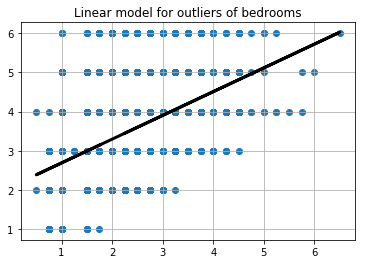

In [15]:
regr_bath_bed = linear_model.LinearRegression()
regr_bath_bed.fit(dataset4['bathrooms'].reshape(-1,1), dataset4['bedrooms'])
plt.scatter(dataset4['bathrooms'],dataset4['bedrooms'])
plt.plot(dataset4['bathrooms'], regr_bath_bed.predict(dataset4['bathrooms'].reshape(-1,1)), color = 'black', linewidth = 3)
#plt.scatter(dataset4.bathrooms[dataset4.bedrooms > 6], dataset4.bedrooms[dataset4.bedrooms > 6],color = "red")
plt.title("Linear model for outliers of bedrooms")

plt.grid()
plt.show()



### b. Outliers of Bathroom

#### Showing the scatter plot of 'price and the number of bedrooms' and 'the number of bathrooms and number of bedrooms', we can see that most of the points are around the cluster except outliers. 

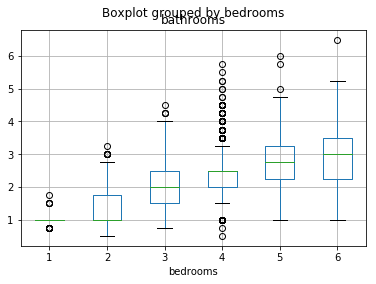

In [16]:
bp_bathroom = dataset4.boxplot(column = 'bathrooms', by= 'bedrooms')

From the boxplot, we can see that in the "bathrooms" column, the outliers are mainly starting from 4

In [17]:
dataset4[dataset4['bathrooms'] > 4]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
19,3575303430,20141016T000000,780000.0,6,4.25,4310,10000,2.0,0,0,3,8,2950,1360,2008,0,98074,47.6214,-122.062
262,2124069115,20141021T000000,1830000.0,4,4.25,4500,215186,2.0,0,3,3,11,2630,1870,2009,0,98029,47.5590,-122.045
292,1245002391,20141022T000000,1400000.0,5,4.25,4230,6907,2.0,0,0,3,10,3450,780,2008,0,98033,47.6866,-122.205
527,8089510170,20141027T000000,935000.0,5,4.50,4230,9701,2.0,0,0,3,10,4230,0,1999,0,98006,47.5444,-122.131
715,4232900310,20141029T000000,1430000.0,5,4.25,3350,3600,2.0,0,0,3,10,2260,1090,2014,0,98119,47.6351,-122.364
878,2025770560,20141103T000000,930000.0,4,4.25,5710,24663,2.0,0,0,3,11,5710,0,2007,0,98092,47.3065,-122.158
1141,7237500360,20141106T000000,1500000.0,4,4.25,5550,12968,2.0,0,0,3,11,5550,0,2005,0,98059,47.5305,-122.135
1248,7237500390,20141110T000000,1570000.0,5,4.50,6070,14731,2.0,0,0,3,11,6070,0,2004,0,98059,47.5306,-122.134
1537,5317100294,20141113T000000,1333000.0,4,4.50,3130,5126,3.0,0,0,3,10,2450,680,2014,0,98112,47.6239,-122.290
1584,8924600020,20141114T000000,1535000.0,4,4.50,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275





There are 80 rows of all outliers, but 67 of 80 are "4-5". So I seperate those outliers into two conditions : "4-5" and ">=5".



In [18]:
# outliers with more than five bathrooms
dataset4[dataset4['bathrooms'] >= 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1623,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,3,11,6110,0,2005,0,98059,47.5285,-122.135
1719,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372
2749,98000950,20141210T000000,1060000.0,4,5.25,4140,14757,2.0,0,2,3,11,4140,0,2005,0,98075,47.5871,-121.969
3496,2175100055,20141230T000000,1700000.0,5,5.00,4930,14649,2.0,0,3,3,11,4160,770,2000,0,98040,47.5829,-122.247
3830,2922059212,20150109T000000,480000.0,6,5.00,3028,18055,2.0,0,0,3,7,3028,0,2005,0,98030,47.3651,-122.197
4468,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013
5197,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114
6361,5469650040,20150316T000000,784500.0,4,5.00,5820,13906,2.0,0,0,3,11,3750,2070,1993,0,98042,47.3814,-122.164
6853,98000130,20150324T000000,1425000.0,4,5.00,4630,24054,2.0,0,3,3,11,4630,0,2005,0,98075,47.5870,-121.966


Here I want to check other houses which also has larger area as $index = 7196$ whether they have the same number of bathrooms as $index = 7196$

In [19]:
# check other larger houses : data sqft_living >= 6260 (which has the most bathrooms)
dataset4[dataset4.sqft_living >= 6260]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1881,1725059316,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,3,13,4900,1430,2000,0,98033,47.6488,-122.201
2033,3425059222,20141124T000000,1300000.0,6,3.50,6563,32670,2.0,0,0,3,10,5153,1410,2002,0,98005,47.6078,-122.157
2135,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764
4200,2524069078,20150122T000000,2700000.0,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
4242,323079101,20150123T000000,1800000.0,4,3.50,6370,205603,2.0,0,0,3,12,6370,0,2008,0,98027,47.5016,-121.905
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362
4468,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013
5197,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114


From the above dataframe, we can see all house whose sqft_living is larger than 6260. Actually, most of them have 3 to 4 bathrooms, so that more than 5 bathrooms should be outliers. 

In [20]:
# drop outliers of bathroom
dataset4.drop(list(dataset4.index[dataset4['bathrooms'] >= 5]), inplace = True)

### c. Outliers of Price


#### Use linear regression to find out the outliers of "price" with single variable "sqft_lot", due to the relationship between the price of property and Square footage of the land space.

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


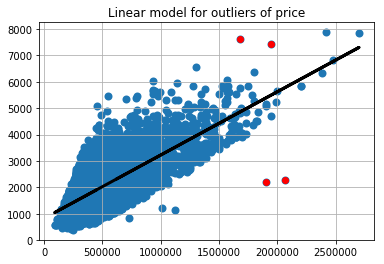

In [21]:
# use linear regression to show 
regr_price = linear_model.LinearRegression()
regr_price.fit(dataset4['price'].reshape(-1,1), dataset4['sqft_living'])
plt.scatter(dataset4["price"],dataset4['sqft_living'], linewidth =2 )
plt.plot(dataset4['price'], regr_price.predict(dataset4['price'].reshape(-1,1)), color = 'black', linewidth = 3)
plt.title("Linear model for outliers of price")
plt.scatter(dataset4.price[(dataset4.price <2000000)& (dataset4.sqft_living >7000) ], dataset4.sqft_living[(dataset4.price <2000000)& (dataset4.sqft_living >7000) ],color = "red")
plt.scatter(dataset4.price[(dataset4.price>1500000) & (dataset4.sqft_living < 3000)], dataset4.sqft_living[(dataset4.price>1500000) & (dataset4.sqft_living < 3000)],color = "red")

plt.grid()
plt.show()

The outliers of price are the most far away the linear model. The point which is around "price"=2000000 and "sqft_living" > 7000, it means that this house has large living area but much lower price.

In [22]:
# extract the point the most far away and above the line, location is(900000, 7120)
dataset4[(dataset4.price <2000000)& (dataset4.sqft_living >7000) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2135,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764


The two point which is below linear model line have higer price but with the much smaller land space

In [23]:
dataset4[(dataset4.price>1500000) & (dataset4.sqft_living < 3000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3777,9808630120,20150108T000000,1.903987e+06,3,2.5,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203
8869,8943600430,20150423T000000,2.066243e+06,3,2.5,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


Actually, all of those outliers, I think they are real values. It is possible that some houses have lower price but larger landspace due to some problems or smaller landspace with higher price due to the good area.


### d. Outliers of sqft_lot


#### use boxplot to find out outliers

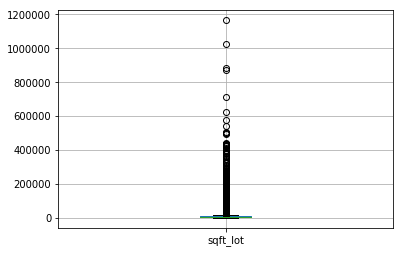

In [24]:
dataset4.boxplot(column = 'sqft_lot')

In [25]:
dataset4[dataset4.sqft_lot > 600000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3628,2724079090,20150105T000000,1650000.0,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.896
3725,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882
4055,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744
7157,522079022,20150327T000000,700000.0,3,2.50,2530,623779,1.0,0,0,4,8,2530,0,1980,0,98038,47.4188,-121.949
7656,619079096,20150406T000000,750000.0,3,2.50,2350,715690,1.5,0,0,4,9,2350,0,1979,0,98022,47.1622,-121.971
9566,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909


### index: 9566
In the last one whose price is only 190000, and contains two bedrooms and one bathroom and only 710 sqft_living area. It seems that it doesn't make sense. So that it should be the outlier.


In [26]:
#drop outliers of sqft_lot
dataset4.drop([9566], inplace = True)

### e. Outliers of sqft_living

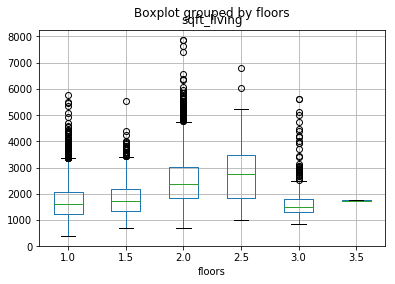

In [27]:
dataset4.boxplot(column = 'sqft_living', by= 'floors')

In [28]:
dataset4[(dataset4.floors == 2)& (dataset4.sqft_living >7000) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2135,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764
4200,2524069078,20150122T000000,2700000.0,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362


There are some house has very large area with four to five bedrooms which I think is possible.

###  f. Outliers of sqft_above and sqft_basement

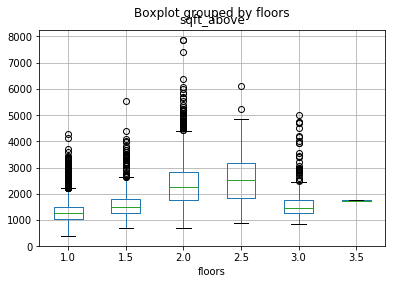

In [29]:
dataset4.boxplot(column = 'sqft_above', by= 'floors')

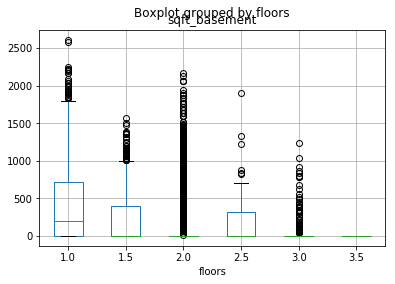

In [30]:
dataset4.boxplot(column = 'sqft_basement', by= 'floors')

In [31]:
dataset4[(dataset4.floors == 2)& (dataset4.sqft_above >7000) ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764
4200,2524069078,20150122T000000,2700000.0,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362


Those house which contains four or five bedrooms and four bathrooms are possible in a large living area althrough only two floors.




### Grade

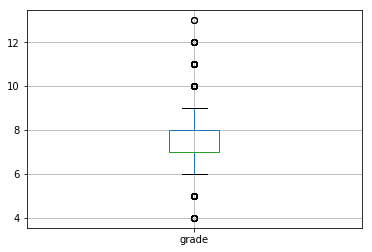

In [32]:
dataset4.boxplot(column = 'grade')

Because the description of the Grade is not clear, I am not sure whether they are outliers or not. So I just point them out and keep them.

## 3. Output

In [33]:
dataset4.set_index(['id'], inplace = True)
dataset4.to_csv("C:/Users/XiaoFan/Desktop/5196 wrangling/dataset4_solution.csv", encoding='utf-8')

## Additional: Local outlier factors


I tried LOF method for finding out outliers, but failed

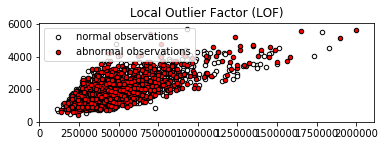

8966

In [34]:
from sklearn.neighbors import LocalOutlierFactor
databathl = pd.DataFrame(dataset4[['price','sqft_living']])
#databathl = databathl[databathl['price'] > 1000000]
X_price_living = np.array(databathl)


clf1 = LocalOutlierFactor(n_neighbors= 20)
y_pre = clf1.fit_predict(X_price_living)
outlier1 = []
for i, j in enumerate(y_pre):
    if j == 1:
        outlier1.append(i)


xx, yy = np.meshgrid(np.linspace(0, 25, 50), np.linspace(0, 25, 50))
# boundary
Z = clf1._decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.subplot(211)
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_price_living[:1000, 0], X_price_living[:1000, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X_price_living[8994:, 0], X_price_living[8994:, 1], c='red',
                edgecolor='k', s=20)
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")


plt.show()

len(outlier1)

This plot doesn't show the outlers clearly because there are too many red points which makes the result confusing. 